##  FT9ja CODE ASESSMENT

### Sample Project:  Build a portfolio using Markowitz's modern portfolio theory
~~~ 
Language: Python
Asset: Technology Stocks in the S&P 500
Notebook: Jupyter or Google Colab
 ~~~

### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from scipy.optimize import minimize

### Import the data to be used from S&P500 Technology stock using yfinance

I would be using 5 tech stocks from the S&P 500
~~~
1. Apple Inc. ( AAPL)
2. Microsoft Corp. ( MSFT)
3. Amazon.com Inc. ( AMZN)
4. Alphabet Inc. Class A (GOOGL)
5. Tesla Inc. ( TSLA)
~~~

In [2]:
#create a list of tech stock to be used

tech_stocks = ["AAPL", "MSFT", "AMZN", "GOOGL","TSLA"]

In [3]:
#download the historical data for the tech stock between 1st of January, 2023 and 30th of June, 2023 

data = yf.download(tech_stocks,start="2023-01-01", end="2023-06-30")
data.head(10)

[*********************100%%**********************]  5 of 5 completed


Adj Close                                                \
                  AAPL       AMZN      GOOGL        MSFT        TSLA   
Date                                                                   
2023-01-03  124.538658  85.820000  89.120003  237.956329  108.099998   
2023-01-04  125.823189  85.139999  88.080002  227.547363  113.639999   
2023-01-05  124.488869  83.120003  86.199997  220.803360  110.339996   
2023-01-06  129.069336  86.080002  87.339996  223.405609  113.059998   
2023-01-09  129.597076  87.360001  88.019997  225.580765  119.769997   
2023-01-10  130.174622  89.870003  88.419998  227.299042  118.849998   
2023-01-11  132.922897  95.089996  91.519997  234.172150  123.220001   
2023-01-12  132.843231  95.269997  91.129997  236.893570  123.559998   
2023-01-13  134.187485  98.120003  92.120003  237.608704  122.400002   
2023-01-17  135.362488  96.050003  91.290001  238.721115  131.490005   

                 Close                                                ...  \
                  AAPL       AMZN      GOOGL        MSFT        TSLA  ...   
Date                                                                  ...   
2023-01-03  125.070000  85.820000  89.120003  239.580002  108.099998  ...   
2023-01-04  126.360001  85.139999  88.080002  229.100006  113.639999  ...   
2023-01-05  125.019997  83.120003  86.199997  222.309998  110.339996  ...   
2023-01-06  129.619995  86.080002  87.339996  224.929993  113.059998  ...   
2023-01-09  130.149994  87.360001  88.019997  227.119995  119.769997  ...   
2023-01-10  130.729996  89.870003  88.419998  228.850006  118.849998  ...   
2023-01-11  133.490005  95.089996  91.519997  235.770004  123.220001  ...   
2023-01-12  133.410004  95.269997  91.129997  238.509995  123.559998  ...   
2023-01-13  134.759995  98.120003  92.120003  239.229996  122.400002  ...   
2023-01-17  135.940002  96.050003  91.290001  240.350006  131.490005  ...   

                  Open                                                \
                  AAPL       AMZN      GOOGL        MSFT        TSLA   
Date                                                                   
2023-01-03  130.279999  85.459999  89.589996  243.080002  118.470001   
2023-01-04  126.889999  86.550003  90.349998  232.279999  109.110001   
2023-01-05  127.129997  85.330002  87.470001  227.199997  110.510002   
2023-01-06  126.010002  83.029999  86.790001  223.000000  103.000000   
2023-01-09  130.470001  87.459999  88.360001  226.449997  118.959999   
2023-01-10  130.259995  87.570000  85.980003  227.759995  121.070000   
2023-01-11  131.250000  90.930000  89.180000  231.289993  122.089996   
2023-01-12  133.880005  96.930000  91.480003  235.259995  122.559998   
2023-01-13  132.029999  94.180000  90.849998  237.000000  116.550003   
2023-01-17  134.830002  98.680000  92.059998  237.970001  125.699997   

               Volume                                            
                 AAPL       AMZN     GOOGL      MSFT       TSLA  
Date                                                             
2023-01-03  112117500   76706000  28131200  25740000  231402800  
2023-01-04   89113600   68885100  34854800  50623400  180389000  
2023-01-05   80962700   67930800  27194400  39585600  157986300  
2023-01-06   87754700   83303400  41381500  43613600  220911100  
2023-01-09   70790800   65266100  29003900  27369800  190284000  
2023-01-10   63896200   67756600  30467800  27033900  167642500  
2023-01-11   69458900  103126200  26862000  28669300  183810800  
2023-01-12   71379600   85254800  30258100  27269500  169400900  
2023-01-13   57809700   85549400  26329200  21333300  180714100  
2023-01-17   63646600   72755000  32602400  29831300  186477000  

[10 rows x 30 columns]

### Calculate daily return for each stock

In [4]:
daily_returns = data["Adj Close"].pct_change().dropna()

In [5]:
daily_returns.head(10)

,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2023-01-04,0.010314,-0.007924,-0.011670,-0.043743,0.051249
2023-01-05,-0.010605,-0.023726,-0.021344,-0.029638,-0.029039
2023-01-06,0.036794,0.035611,0.013225,0.011785,0.024651
2023-01-09,0.004089,0.014870,0.007786,0.009736,0.059349
2023-01-10,0.004456,0.028732,0.004544,0.007617,-0.007681
2023-01-11,0.021112,0.058084,0.035060,0.030238,0.036769
2023-01-12,-0.000599,0.001893,-0.004261,0.011621,0.002759
2023-01-13,0.010119,0.029915,0.010864,0.003019,-0.009388
2023-01-17,0.008756,-0.021097,-0.009010,0.004682,0.074265


### Calculate the Portfolio Metrics
~~~
The Expectation:: The Mean return and 
The Risk :: The Variance
~~~

In [6]:
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

In [7]:
mean_returns

AAPL     0.003523
AMZN     0.003524
GOOGL    0.002599
MSFT     0.002951
TSLA     0.007772
dtype: float64

In [8]:
cov_matrix

,AAPL,AMZN,GOOGL,MSFT,TSLA
AAPL,0.000169,0.000161,0.000165,0.000136,0.000225
AMZN,0.000161,0.000502,0.000298,0.000260,0.000307
GOOGL,0.000165,0.000298,0.000444,0.000239,0.000248
MSFT,0.000136,0.000260,0.000239,0.000325,0.000189
TSLA,0.000225,0.000307,0.000248,0.000189,0.001284


In [9]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_stddev

### Optimize my portfolio by maximizing expectation (return) and minimizing risk (portfolio variance) using the Markowitz's theory

In [10]:
# Assuming a risk-free rate of 3%
# Calculate the negative Sharpe ratio as the objective

def portfolio_variance(weights, mean_returns, cov_matrix, riskFreeRate = 0.03):
    portfolio_return, portfolio_stddev = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = -(portfolio_return - riskFreeRate) / portfolio_stddev 
    return sharpe_ratio



In [12]:
# Set constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

In [13]:
# Initial guess for weights
initial_weights = np.ones(len(tech_stocks)) / len(tech_stocks)
initial_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [14]:
#set the args necessary or optimization

args = (mean_returns, cov_matrix)

In [15]:
# Perform optimization

from scipy.optimize import minimize
result = minimize(portfolio_variance,initial_weights, method='SLSQP', args= args, constraints=constraints)

In [16]:
# Extract optimized weights
optimized_weights = result.x


In [17]:
optimized_weights

array([-6087.33983479, -3487.75762322, -7564.31007474, -8105.85849326,
       25246.26602602])

### Visualize Efficient Frontier and the portfolios's position on it

In [18]:
portfolio_return, portfolio_stddev = portfolio_performance(initial_weights, mean_returns, cov_matrix)

# Simulate portfolios for efficient frontier
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tech_stocks))
    weights /= np.sum(weights)
    portfolio_return, portfolio_stddev = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = (portfolio_return - 0.03) / portfolio_stddev  # Adjusted for risk-free rate



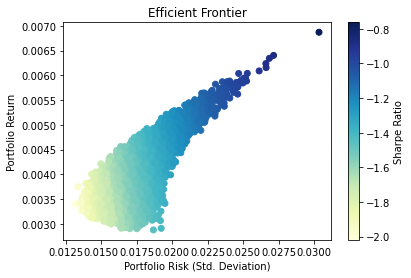

In [19]:
# Plot the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Std. Deviation)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()
